In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
X = torch.rand(100, 1) * 10 # 生成一个100行一列的数据；该数据服从[0,10]的uniform分布
X[:3]

tensor([[4.5532],
        [4.3510],
        [5.8345]])

In [5]:
y = 3 * X + 10 + torch.randn(100, 1) * 3 # 计算对应的y值，y也是100行一列的数据，服从[10,13]的normal分布
y[:3]

tensor([[24.6101],
        [21.3013],
        [28.9698]])

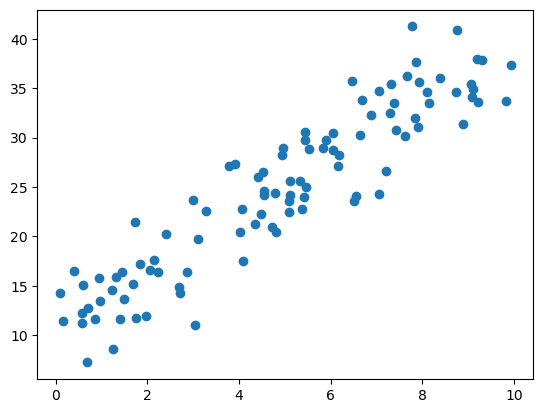

In [6]:
plt.scatter(X.numpy(), y.numpy()) # 绘制散点图
plt.show()

## 线性回归模型

### 定义模型

In [7]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features = 1, out_features = 1, bias = True)
    def forward(self, x):
        predict = self.linear(x)
        return predict

### 训练模型

In [8]:
model = LinearRegression()

#### 定义梯度下降器，这里是随机梯度下降法

In [9]:
'''
torch.optim包中有很多优化器，比如SGD、Adam、RMSprop等，这里使用随机梯度下降法。
torch.optim.SGD接受的几个重要参数：
- params：需要优化的参数，这里是模型的线性层
- lr：学习率，即每次更新的步长
- momentum：动量，即梯度的指数衰减率
- weight_decay：权重衰减，即L2正则化的系数
'''
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

# 查看模型的参数
for param in model.parameters(): # 因为模型有多个参数，所以model.parameters()返回的是一个可迭代对象
    print(param)

Parameter containing:
tensor([[0.7779]], requires_grad=True)
Parameter containing:
tensor([0.3673], requires_grad=True)


### 定义损失函数，这里使用MSE

In [11]:
loss_function = torch.nn.MSELoss()

#### 训练模型

In [13]:
for epoch in range(10000):
    # 前向传播
    predict_y = model(X)
    
    # 计算损失
    loss = loss_function(predict_y, y)
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    optimizer.step()
    
    # 清空梯度
    optimizer.zero_grad()

### check the result

In [14]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[2.8697]], requires_grad=True)
Parameter containing:
tensor([10.6333], requires_grad=True)


### 再次绘制图像

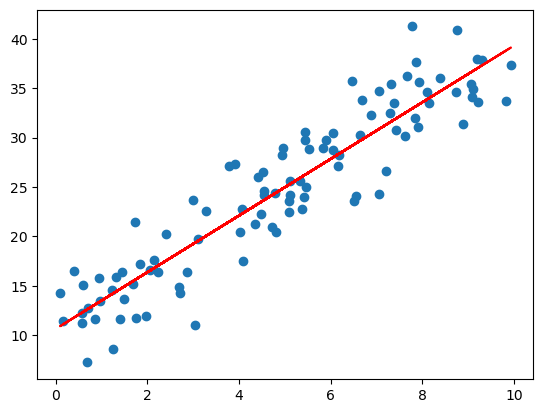

In [15]:
plt.scatter(X, y)
plt.plot(X, model(X).detach().numpy(), color = 'r')
plt.show()